In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


from xgboost import XGBClassifier

In [2]:
raw_df = pd.read_csv('after_df.csv')
after_df = raw_df.copy()

In [3]:
after_df = after_df.drop(columns=['segment', 'electrode', 'el_10-20', 'epoch'])

In [4]:
after_df

,subject,condition,N1,N2,N3,R,W,delta,theta,alpha,beta,gamma,offset,exponent
0,P07,placebo,0.010277,0.010826,0.009872,0.000959,0.968066,2.497184,1.618158,1.225892,1.708981,0.485769,0.278161,1.132959
1,P07,placebo,0.109079,0.039461,0.043310,0.015815,0.792335,2.497184,1.618158,1.225892,1.708981,0.485769,0.278161,1.132959
2,P07,placebo,0.023443,0.045758,0.001847,0.001733,0.927220,2.497184,1.618158,1.225892,1.708981,0.485769,0.278161,1.132959
3,P07,placebo,0.032536,0.115541,0.017605,0.003811,0.830507,2.497184,1.618158,1.225892,1.708981,0.485769,0.278161,1.132959
4,P07,placebo,0.029307,0.065396,0.005016,0.001354,0.898928,2.497184,1.618158,1.225892,1.708981,0.485769,0.278161,1.132959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52003,P21,DMT,0.236950,0.100131,0.000512,0.414687,0.247720,3.712016,3.845460,3.341275,1.795292,0.315021,0.555085,1.397614
52004,P21,DMT,0.140110,0.284610,0.001716,0.194352,0.379213,3.712016,3.845460,3.341275,1.795292,0.315021,0.555085,1.397614
52005,P21,DMT,0.022603,0.168655,0.002157,0.150242,0.656343,3.712016,3.845460,3.341275,1.795292,0.315021,0.555085,1.397614
52006,P21,DMT,0.049198,0.208695,0.009472,0.048779,0.683856,3.712016,3.845460,3.341275,1.795292,0.315021,0.555085,1.397614


In [5]:
df = after_df.groupby(['subject', 'condition']).mean().reset_index()

In [6]:
df['binary_condition'] = df['condition'].apply(lambda x: 1 if x == 'DMT' else 0)

In [7]:
df

,subject,condition,N1,N2,N3,R,W,delta,theta,alpha,beta,gamma,offset,exponent,binary_condition
0,P07,DMT,0.118702,0.485652,0.019895,0.064371,0.311380,2.934812,1.769235,1.219148,3.294608,0.575925,0.311163,1.098264,1
1,P07,placebo,0.127091,0.315581,0.029053,0.091748,0.436527,2.514966,1.599970,1.210560,1.663031,0.437958,0.277375,1.170214,0
2,P08,DMT,0.122582,0.347472,0.018645,0.114606,0.396694,2.305472,1.214307,3.522030,1.693788,0.289642,0.300992,1.293975,1
3,P08,placebo,0.139484,0.147309,0.080033,0.126273,0.506901,4.024722,2.920519,21.756968,3.761522,0.546291,0.563478,1.268284,0
4,P09,DMT,0.144945,0.274888,0.018346,0.132609,0.429213,4.805205,2.723137,2.098490,1.998874,0.329955,0.604771,1.456960,1
5,P09,placebo,0.111320,0.265129,0.021281,0.103244,0.499026,5.767487,3.891829,4.591340,2.356878,0.420767,0.772378,1.504702,0
6,P10,DMT,0.113295,0.307603,0.016124,0.139316,0.423661,4.457949,2.704651,1.878737,2.787133,0.313800,0.657430,1.475181,1
7,P10,placebo,0.072161,0.098813,0.017535,0.213207,0.598284,7.399147,4.507539,4.740624,2.041674,0.301386,1.237253,1.849967,0
8,P11,DMT,0.115411,0.239015,0.017418,0.144450,0.483706,6.499073,6.228427,11.275305,5.933508,0.558087,0.935474,1.504173,1
9,P11,placebo,0.124207,0.140650,0.014748,0.154400,0.565994,7.573950,9.575421,25.723331,6.837410,0.755268,1.077771,1.480970,0


In [8]:
X, y = df.drop(columns=['subject','condition','binary_condition']), df['binary_condition']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5454545454545454


In [12]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
35,0,1
13,0,1
26,1,0
30,1,0
16,1,1
31,0,0
21,0,0
12,1,1
8,1,0
17,0,0


<Figure size 800x600 with 0 Axes>

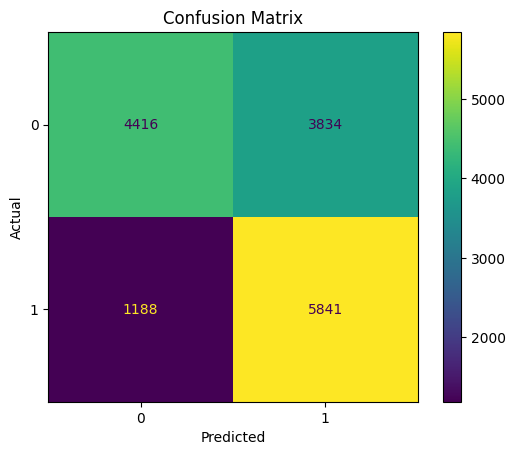

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#v2

In [13]:
after_df_2 = raw_df.copy()
after_df_2.drop(columns=['segment', 'electrode', 'el_10-20'])

,subject,epoch,condition,N1,N2,N3,R,W,delta,theta,alpha,beta,gamma,offset,exponent
0,P07,0,placebo,0.010277,0.010826,0.009872,0.000959,0.968066,2.497184,1.618158,1.225892,1.708981,0.485769,0.278161,1.132959
1,P07,1,placebo,0.109079,0.039461,0.043310,0.015815,0.792335,2.497184,1.618158,1.225892,1.708981,0.485769,0.278161,1.132959
2,P07,2,placebo,0.023443,0.045758,0.001847,0.001733,0.927220,2.497184,1.618158,1.225892,1.708981,0.485769,0.278161,1.132959
3,P07,3,placebo,0.032536,0.115541,0.017605,0.003811,0.830507,2.497184,1.618158,1.225892,1.708981,0.485769,0.278161,1.132959
4,P07,4,placebo,0.029307,0.065396,0.005016,0.001354,0.898928,2.497184,1.618158,1.225892,1.708981,0.485769,0.278161,1.132959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52003,P21,5,DMT,0.236950,0.100131,0.000512,0.414687,0.247720,3.712016,3.845460,3.341275,1.795292,0.315021,0.555085,1.397614
52004,P21,6,DMT,0.140110,0.284610,0.001716,0.194352,0.379213,3.712016,3.845460,3.341275,1.795292,0.315021,0.555085,1.397614
52005,P21,7,DMT,0.022603,0.168655,0.002157,0.150242,0.656343,3.712016,3.845460,3.341275,1.795292,0.315021,0.555085,1.397614
52006,P21,8,DMT,0.049198,0.208695,0.009472,0.048779,0.683856,3.712016,3.845460,3.341275,1.795292,0.315021,0.555085,1.397614


#cgathpt

In [14]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = raw_df.copy()

# Drop unnecessary columns
X = df.drop(columns=['subject', 'epoch', 'condition', 'electrode', 'el_10-20', 'segment'])
y = (df['condition'] == 'DMT').astype(int)  # binary label
groups = df['subject']  # for grouped splitting

# Optional: scale features (can help with small differences)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Grouped train/test split (ensures no subject appears in both sets)
gss = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
train_idx, test_idx = next(gss.split(X_scaled, y, groups=groups))
X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Train XGBoost
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Optional: see predictions
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


/Users/javierrojas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [16:26:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6713135676418613


,Actual,Predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
51850,1,1
51851,1,1
51852,1,1
51853,1,1


In [15]:
y_pred_2 = model.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred_2))

# Optional: see predictions
pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_2})

Accuracy: 0.965286286041003


,Actual,Predicted
177,0,1
178,0,1
179,0,1
180,0,1
181,0,1
...,...,...
52003,1,1
52004,1,1
52005,1,1
52006,1,1


In [16]:
feature_names = X.columns

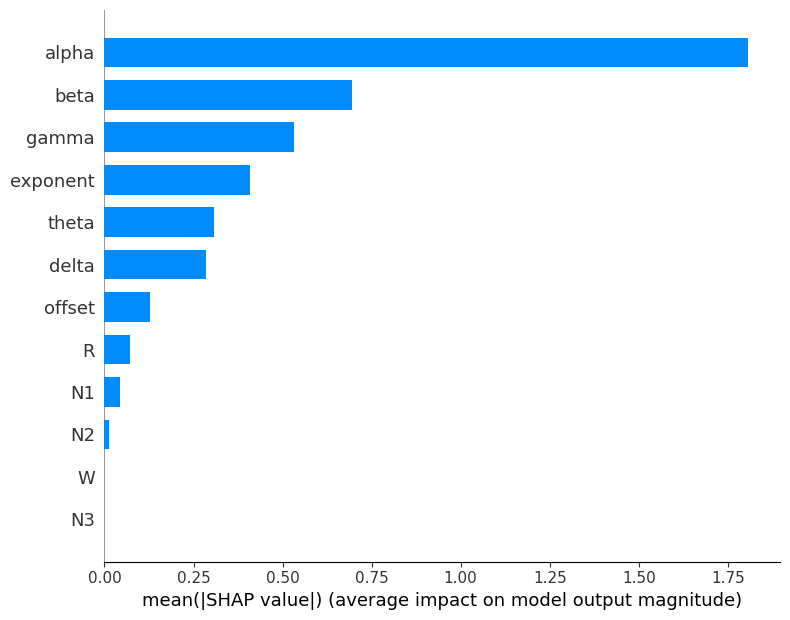

In [17]:
import shap

# 1. Create SHAP explainer
explainer = shap.TreeExplainer(model, feature_names=feature_names)

# 2. Compute SHAP values on test set
shap_values = explainer(X_test)

# 3. Global explanations
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Local explanation for first test instance
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test[0])

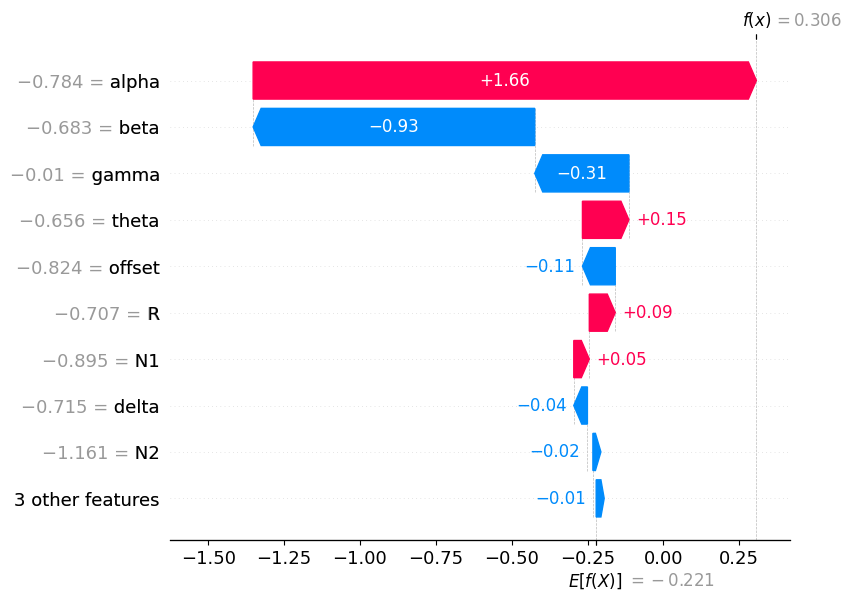

In [18]:
shap.plots.waterfall(shap_values[0])

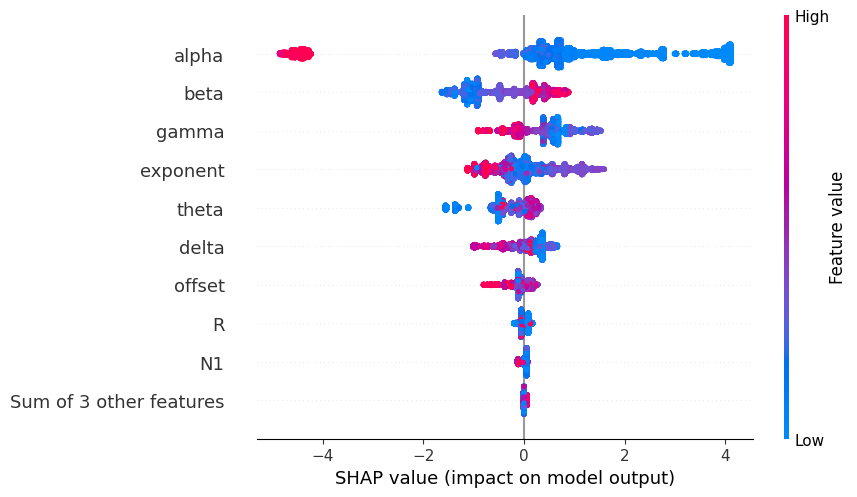

In [19]:
shap.plots.beeswarm(shap_values)

## before test

In [20]:
df_before = pd.read_csv('before_df.csv')

In [21]:
df_before

,subject,epoch,condition,segment,electrode,el_10-20,N1,N2,N3,R,W,delta,theta,alpha,beta,gamma,offset,exponent
0,P07,0,placebo,before,E144,C2,0.049775,0.312044,0.000506,0.010832,0.626843,2.511136,1.613793,1.263608,1.646971,0.448827,0.294857,1.156276
1,P07,1,placebo,before,E144,C2,0.075709,0.102337,0.003889,0.032159,0.785905,2.511136,1.613793,1.263608,1.646971,0.448827,0.294857,1.156276
2,P07,2,placebo,before,E144,C2,0.039413,0.239041,0.013051,0.029264,0.679231,2.511136,1.613793,1.263608,1.646971,0.448827,0.294857,1.156276
3,P07,3,placebo,before,E144,C2,0.073483,0.204379,0.009482,0.136357,0.576298,2.511136,1.613793,1.263608,1.646971,0.448827,0.294857,1.156276
4,P07,4,placebo,before,E144,C2,0.321572,0.238566,0.007948,0.083547,0.348367,2.511136,1.613793,1.263608,1.646971,0.448827,0.294857,1.156276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,P21,5,DMT,before,E148,Iz,0.224011,0.190508,0.003719,0.183232,0.398530,4.397360,8.816736,2.002454,1.771064,0.429314,0.578829,1.340487
11810,P21,6,DMT,before,E148,Iz,0.233422,0.163273,0.008424,0.077494,0.517386,4.397360,8.816736,2.002454,1.771064,0.429314,0.578829,1.340487
11811,P21,7,DMT,before,E148,Iz,0.126079,0.103006,0.160597,0.219872,0.390445,4.397360,8.816736,2.002454,1.771064,0.429314,0.578829,1.340487
11812,P21,8,DMT,before,E148,Iz,0.027606,0.061960,0.006495,0.767310,0.136628,4.397360,8.816736,2.002454,1.771064,0.429314,0.578829,1.340487


In [22]:
X_ = df_before.drop(columns=['segment', 'electrode', 'el_10-20', 'epoch'])
y_ = (df_before['condition'] == 'X').astype(int)

In [23]:
X_

,subject,condition,N1,N2,N3,R,W,delta,theta,alpha,beta,gamma,offset,exponent
0,P07,placebo,0.049775,0.312044,0.000506,0.010832,0.626843,2.511136,1.613793,1.263608,1.646971,0.448827,0.294857,1.156276
1,P07,placebo,0.075709,0.102337,0.003889,0.032159,0.785905,2.511136,1.613793,1.263608,1.646971,0.448827,0.294857,1.156276
2,P07,placebo,0.039413,0.239041,0.013051,0.029264,0.679231,2.511136,1.613793,1.263608,1.646971,0.448827,0.294857,1.156276
3,P07,placebo,0.073483,0.204379,0.009482,0.136357,0.576298,2.511136,1.613793,1.263608,1.646971,0.448827,0.294857,1.156276
4,P07,placebo,0.321572,0.238566,0.007948,0.083547,0.348367,2.511136,1.613793,1.263608,1.646971,0.448827,0.294857,1.156276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,P21,DMT,0.224011,0.190508,0.003719,0.183232,0.398530,4.397360,8.816736,2.002454,1.771064,0.429314,0.578829,1.340487
11810,P21,DMT,0.233422,0.163273,0.008424,0.077494,0.517386,4.397360,8.816736,2.002454,1.771064,0.429314,0.578829,1.340487
11811,P21,DMT,0.126079,0.103006,0.160597,0.219872,0.390445,4.397360,8.816736,2.002454,1.771064,0.429314,0.578829,1.340487
11812,P21,DMT,0.027606,0.061960,0.006495,0.767310,0.136628,4.397360,8.816736,2.002454,1.771064,0.429314,0.578829,1.340487


In [24]:
X_ = X_.drop(columns=['condition', 'subject'])
X_ = scaler.transform(X_)
y_pred_2 = model.predict(X_)

In [25]:
print("Accuracy:", accuracy_score(y_, y_pred_2))

# Optional: see predictions
pd.DataFrame({'Actual': y_, 'Predicted': y_pred_2})

Accuracy: 0.7140680548501778


,Actual,Predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
11809,0,0
11810,0,0
11811,0,0
11812,0,0


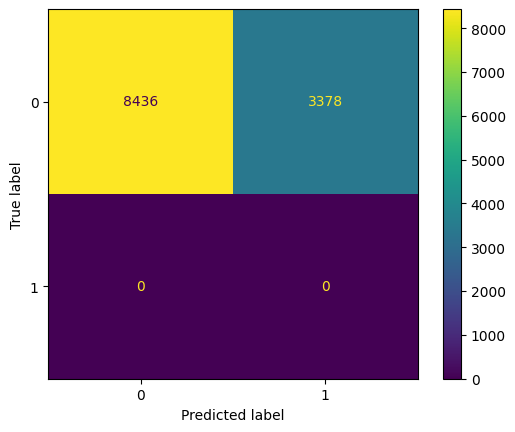

In [28]:
ConfusionMatrixDisplay.from_predictions(y_, y_pred_2)